# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect5. Logistic (regression) classifier

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

### <font color='brown'>Logistic Regression Classifier</font>

$$ H(X) = \frac{1}{1 + e^-W^TX} $$
<br>
$$ cost(W) = -\frac{1}{m} \sum y log(H(x)) + (1-y)(log(1 - H(x)) $$
<br>
$$ W := W - α \frac{σ}{σW} cost(W) $$

In [2]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [3]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})


Step : 0 	 Cost : 1.7307833433151245
Step : 1 	 Cost : 1.709944248199463
Step : 2 	 Cost : 1.6891757249832153
Step : 3 	 Cost : 1.668479561805725
Step : 4 	 Cost : 1.6478610038757324
Step : 5 	 Cost : 1.6273226737976074
Step : 6 	 Cost : 1.6068668365478516
Step : 7 	 Cost : 1.58649742603302
Step : 8 	 Cost : 1.5662187337875366
Step : 9 	 Cost : 1.5460344552993774
Step : 200 	 Cost : 0.5715119242668152
Step : 400 	 Cost : 0.507413923740387
Step : 600 	 Cost : 0.47182419896125793
Step : 800 	 Cost : 0.44758477807044983
Step : 1000 	 Cost : 0.42857107520103455
Step : 1200 	 Cost : 0.41232457756996155
Step : 1400 	 Cost : 0.39775505661964417
Step : 1600 	 Cost : 0.3843378722667694
Step : 1800 	 Cost : 0.37180113792419434
Step : 2000 	 Cost : 0.35999324917793274
Step : 2200 	 Cost : 0.34882211685180664
Step : 2400 	 Cost : 0.3382262885570526
Step : 2600 	 Cost : 0.3281605541706085
Step : 2800 	 Cost : 0.31858906149864197
Step : 3000 	 Cost : 0.3094808757305145
Step : 3200 	 Cost : 0.3008085

In [4]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
    h = h, c = c, a = a
))

# Hypothesis: 
[[ 0.03074029]
 [ 0.15884677]
 [ 0.30486736]
 [ 0.78138196]
 [ 0.93957496]
 [ 0.98016882]] 

# Correct (Y): 
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]] 

# Accuracy: 1.0


### <font color='brown'>Classifying diabetes</font>

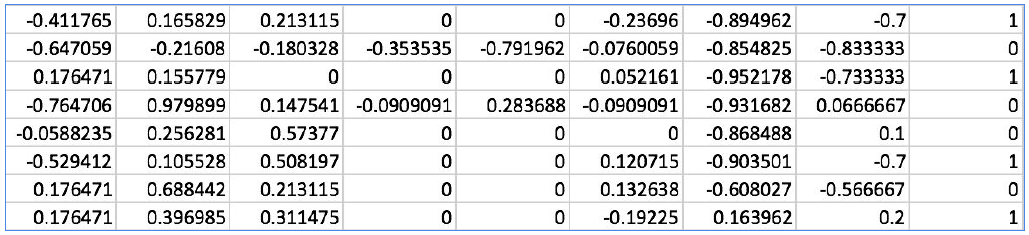

In [5]:
# 당뇨병 분류
bpc.Figure(bpc.ML05_IMG_06, 800)

In [6]:
import pandas as pd

# df = pd.read_csv("./data/data-03-diabetes.csv")
df = pd.read_csv("./data/data-03-diabetes.csv", header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
5,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1
6,-0.647059,-0.216080,-0.180328,-0.353535,-0.791962,-0.076006,-0.854825,-0.833333,0
7,0.176471,0.155779,0.000000,0.000000,0.000000,0.052161,-0.952178,-0.733333,1
8,-0.764706,0.979899,0.147541,-0.090909,0.283688,-0.090909,-0.931682,0.066667,0
9,-0.058824,0.256281,0.573770,0.000000,0.000000,0.000000,-0.868488,0.100000,0


In [7]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('./data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# print(x_data.shape, y_data.shape)
print(" x_data.shape : {x_shape} \n y_data.shape : {y_shape}".format(
        x_shape = x_data.shape, 
        y_shape = y_data.shape
    ))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))



 x_data.shape : (759, 8) 
 y_data.shape : (759, 1)


In [8]:
print(len(xy)) 
xy[:10]

759


array([[-0.29411799,  0.48743701,  0.180328  , -0.29292899,  0.        ,
         0.00149028, -0.53117001, -0.0333333 ,  0.        ],
       [-0.88235301, -0.14572901,  0.0819672 , -0.414141  ,  0.        ,
        -0.20715301, -0.76686603, -0.66666698,  1.        ],
       [-0.0588235 ,  0.83919603,  0.0491803 ,  0.        ,  0.        ,
        -0.30551401, -0.49274099, -0.63333303,  0.        ],
       [-0.88235301, -0.105528  ,  0.0819672 , -0.53535402, -0.77777803,
        -0.162444  , -0.92399698,  0.        ,  1.        ],
       [ 0.        ,  0.37688401, -0.344262  , -0.29292899, -0.60283703,
         0.28465   ,  0.88727599, -0.60000002,  0.        ],
       [-0.41176501,  0.165829  ,  0.21311501,  0.        ,  0.        ,
        -0.23695999, -0.89496201, -0.69999999,  1.        ],
       [-0.64705902, -0.21608   , -0.180328  , -0.353535  , -0.79196203,
        -0.0760059 , -0.85482502, -0.83333302,  0.        ],
       [ 0.17647099,  0.155779  ,  0.        ,  0.        ,  0

In [9]:
print(len(x_data)) 
x_data[:10]

759


array([[-0.29411799,  0.48743701,  0.180328  , -0.29292899,  0.        ,
         0.00149028, -0.53117001, -0.0333333 ],
       [-0.88235301, -0.14572901,  0.0819672 , -0.414141  ,  0.        ,
        -0.20715301, -0.76686603, -0.66666698],
       [-0.0588235 ,  0.83919603,  0.0491803 ,  0.        ,  0.        ,
        -0.30551401, -0.49274099, -0.63333303],
       [-0.88235301, -0.105528  ,  0.0819672 , -0.53535402, -0.77777803,
        -0.162444  , -0.92399698,  0.        ],
       [ 0.        ,  0.37688401, -0.344262  , -0.29292899, -0.60283703,
         0.28465   ,  0.88727599, -0.60000002],
       [-0.41176501,  0.165829  ,  0.21311501,  0.        ,  0.        ,
        -0.23695999, -0.89496201, -0.69999999],
       [-0.64705902, -0.21608   , -0.180328  , -0.353535  , -0.79196203,
        -0.0760059 , -0.85482502, -0.83333302],
       [ 0.17647099,  0.155779  ,  0.        ,  0.        ,  0.        ,
         0.052161  , -0.952178  , -0.73333299],
       [-0.76470602,  0.97989899

In [10]:
print(len(y_data)) 
y_data[:10]

759


array([[ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.]], dtype=float32)

In [11]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})       
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))    

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    

Step : 0 	 Cost : 0.97422194480896
Step : 1 	 Cost : 0.9717562198638916
Step : 2 	 Cost : 0.9693101644515991
Step : 3 	 Cost : 0.966883659362793
Step : 4 	 Cost : 0.9644770622253418
Step : 5 	 Cost : 0.9620893597602844
Step : 6 	 Cost : 0.9597210884094238
Step : 7 	 Cost : 0.9573723077774048
Step : 8 	 Cost : 0.9550420045852661
Step : 9 	 Cost : 0.9527310729026794
Step : 200 	 Cost : 0.7338058352470398
Step : 400 	 Cost : 0.6805427670478821
Step : 600 	 Cost : 0.657383143901825
Step : 800 	 Cost : 0.6405060887336731
Step : 1000 	 Cost : 0.625989556312561
Step : 1200 	 Cost : 0.6130377650260925
Step : 1400 	 Cost : 0.601396381855011
Step : 1600 	 Cost : 0.5909146666526794
Step : 1800 	 Cost : 0.5814695358276367
Step : 2000 	 Cost : 0.5729514360427856
Step : 2200 	 Cost : 0.5652616620063782
Step : 2400 	 Cost : 0.5583115220069885
Step : 2600 	 Cost : 0.5520215034484863
Step : 2800 	 Cost : 0.546320378780365
Step : 3000 	 Cost : 0.5411451458930969
Step : 3200 	 Cost : 0.5364395380020142
S

In [12]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
    # h = h, c = c, a = a
    h = h[:20], c = c[:20], a = a
))

# Hypothesis: 
[[ 0.3700318 ]
 [ 0.91548049]
 [ 0.21602735]
 [ 0.94834936]
 [ 0.08354768]
 [ 0.76475239]
 [ 0.94660914]
 [ 0.62400973]
 [ 0.24575189]
 [ 0.53068644]
 [ 0.70052218]
 [ 0.17214663]
 [ 0.16543275]
 [ 0.2199429 ]
 [ 0.71247756]
 [ 0.45385256]
 [ 0.73282206]
 [ 0.86161494]
 [ 0.81474245]
 [ 0.55559713]] 

# Correct (Y): 
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]] 

# Accuracy: 0.7667984366416931


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>